In [1]:
import sys
sys.path.append('../centroFlye_repo/scripts')

import matplotlib
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from collections import defaultdict, Counter

from utils.bio import read_bio_seq, compress_homopolymer
from ncrf_parser import NCRF_Report

import edlib

In [2]:
plt.rcParams['figure.figsize'] = [10, 8]


# Various numbers from the text

In [3]:
polished_sequence_fn = \
"../data/centroFlye_results/polishing/final_sequence_4.fasta"


In [4]:
polished_sequence = read_bio_seq(polished_sequence_fn)
hpc_polished_sequence = compress_homopolymer(polished_sequence)

In [5]:
!python ../centroFlye_repo/scripts/run_ncrf_parallel.py \
    --reads {polished_sequence_fn} \
    -t 1 \
    --outdir ../data/centroFlye_results/polishing/NCRF_rc_star \
    --repeat ../data/centroFlye_results/DXZ1_star/DXZ1_rc_star.fasta


(1 alignment reported)


In [6]:
genomic_nrcf = \
"../data/centroFlye_results/polishing/NCRF_rc_star/report.ncrf"
ncrf_genome_report = NCRF_Report(genomic_nrcf)


Length of polished sequence

In [7]:
len(polished_sequence)

3103541

Number of units

In [8]:
len(ncrf_genome_report.get_motif_alignments()['polished_repeat_4'])

1510

In [9]:
def get_unique_kmers(seq, k=19):
    kmers_distr = Counter(seq[i:i+k] for i in range(len(seq)-k+1))
    unique_kmers = [k for k, v in kmers_distr.items() if v == 1]
    return unique_kmers

Number of unique kmers

In [10]:
unique_kmers = get_unique_kmers(polished_sequence)
unique_kmers_hpc = get_unique_kmers(hpc_polished_sequence)
len(unique_kmers), len(unique_kmers_hpc)

(39530, 26333)

Positions of unique kmers

In [11]:
def get_kmer_positions(seq, k=19):
    pos = defaultdict(list)
    for i in range(len(seq) - k + 1):
        kmer = seq[i:i+k]
        pos[kmer].append(i)
    return pos

In [12]:
kmer_pos = get_kmer_positions(polished_sequence)
hpc_kmer_pos = get_kmer_positions(hpc_polished_sequence)

unique_kmer_pos = [kmer_pos[kmer][0] for kmer in unique_kmers]
unique_hpc_kmer_pos = [hpc_kmer_pos[kmer][0] for kmer in unique_kmers_hpc]


In [13]:
length_in_bin = 20000

# Figure 2, Right

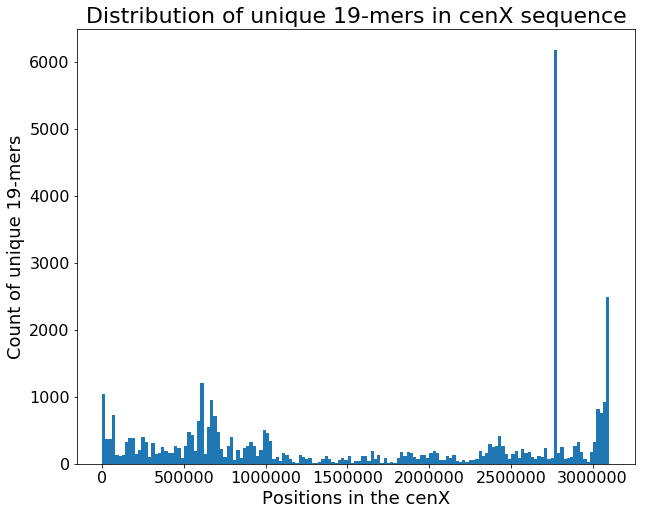

In [14]:
k = 19
bins = int(len(polished_sequence) / length_in_bin)
plt.hist(unique_kmer_pos, bins=bins)
plt.xlabel('Positions in the cenX', fontsize=18)
plt.ylabel(f'Count of unique {k}-mers', fontsize=18)
plt.title(f'Distribution of unique {k}-mers in cenX sequence', fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
pass

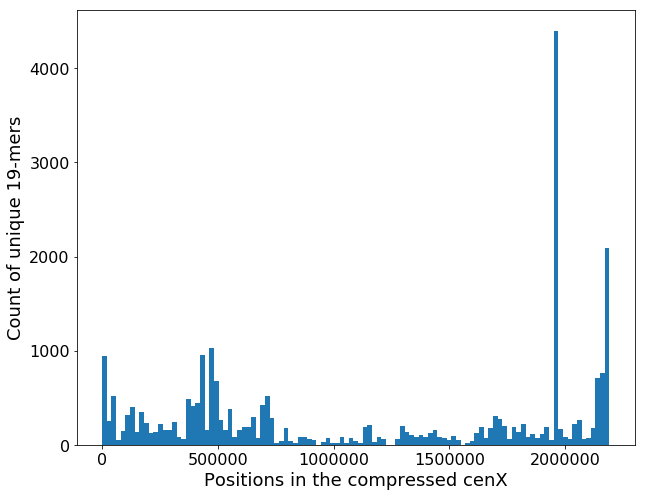

In [15]:
bins = int(len(hpc_polished_sequence) / length_in_bin)
plt.hist(unique_hpc_kmer_pos, bins=bins)
plt.xlabel('Positions in the compressed cenX', fontsize=18)
plt.ylabel(f'Count of unique {k}-mers', fontsize=18)
# plt.title(f'Distribution of unique {k}-mers in compressed cenX sequence', fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
pass

Position of (compressed) LINE in compressed cenX

In [16]:
LINE_fn = "../data/LINE/GU477636.1_LINE-1.fasta"
LINE = read_bio_seq(LINE_fn)
LINE_hpc = compress_homopolymer(LINE)
LINE_alignment = edlib.align(LINE_hpc, hpc_polished_sequence, mode='HW', task='locations')
print(LINE_alignment)
print(LINE_alignment['locations'][0][1] - LINE_alignment['locations'][0][0])

{'editDistance': 431, 'alphabetLength': 4, 'locations': [(1955990, 1960812)], 'cigar': None}
4822


In [17]:
len(LINE), len(LINE_hpc)

(7102, 4888)